In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Demographic Filtering

In [3]:
credits = pd.read_csv('data/tmdb_5000_credits.csv/tmdb_5000_credits.csv')
movies = pd.read_csv('data/tmdb_5000_movies.csv/tmdb_5000_movies.csv')

In [7]:
credits.rename(columns={'movie_id': 'id'}, inplace=True)
df = movies.merge(credits, on='id')

In [8]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


### Demographic Filter Metric

In [14]:
# Average vote and average vote count
c = df['vote_average'].mean()
m = df['vote_count'].quantile(0.9)
print(f'Average vote rating is {c:.2}, and the minimum vote counts (90% quantile) for a movie to be qualified is {m:.2}')

Average vote rating is 6.1, and the minimum vote counts (90% quantile) for a movie to be qualified is 1.8e+03


In [15]:
# Filter out qualified movies
q_movies = df.copy().loc[df['vote_count']>m]
q_movies.shape

(481, 23)

In [16]:
# Matric func
def weighted_rating(x, m=m, c=c):
    v = x['vote_count']
    r = x['vote_average']
    return (v/(v+m)*r) +(m/(m+v)*c)

In [18]:
# Calculate weighted scores and store the info into a new column named score
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [24]:
q_movies = q_movies.sort_values('score', ascending=False)

# Print the top 10 movies
q_movies[['title_x', 'vote_count', 'vote_average', 'score']].head(10)

,title_x,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


Text(0.5, 1.0, 'Top 10 Popular Movies')

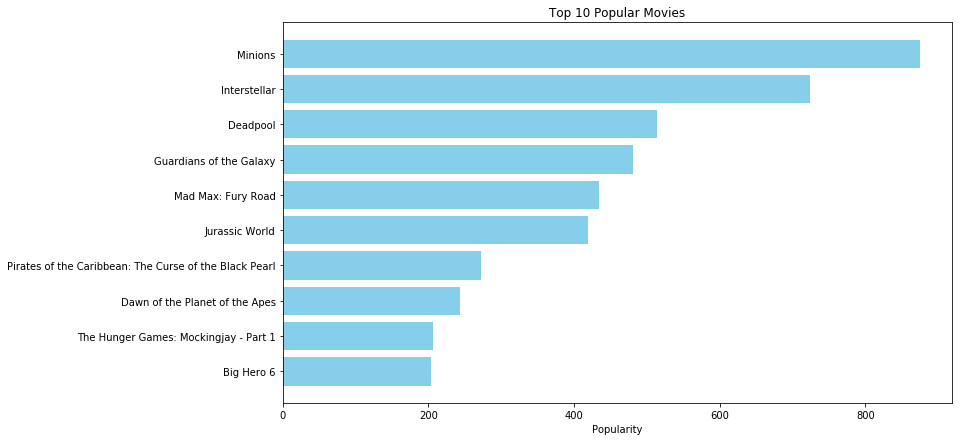

In [31]:
# Print top 10 most popular movies
pop = df.sort_values('popularity', ascending=False)
plt.figure(figsize=(12, 7))

plt.barh(pop.title_x.head(10), pop.popularity.head(10), align='center', color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Popularity')
plt.title('Top 10 Popular Movies')

## Content Based Filtering

In [32]:
df.overview.head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [33]:
# Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

# Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

# Replace NaN with an empty string
df['overview'] = df['overview'].fillna('')

# Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['overview'])

# Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

In [34]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [37]:
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.02160533, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.01488159, 0.        ,
        0.        ],
       ...,
       [0.        , 0.02160533, 0.01488159, ..., 1.        , 0.01609091,
        0.00701914],
       [0.        , 0.        , 0.        , ..., 0.01609091, 1.        ,
        0.01171696],
       [0.        , 0.        , 0.        , ..., 0.00701914, 0.01171696,
        1.        ]])

In [41]:
# Construct a reverse map of indices and movie titles
indices = pd.Series(df.index, index=df['title_x']).drop_duplicates()

# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title_x'].iloc[movie_indices]

In [42]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title_x, dtype: object

In [43]:
get_recommendations('The Avengers')

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title_x, dtype: object

While our system has done a decent job of finding movies with similar plot descriptions, the quality of recommendations is not that great. "The Dark Knight Rises" returns all Batman movies while it is more likely that the people who liked that movie are more inclined to enjoy other Christopher Nolan movies. This is something that cannot be captured by the present system.

From the cast, crew and keywords features, we need to extract the three most important actors, the director and the keywords associated with that movie. Right now, our data is present in the form of "stringified" lists , we need to convert it into a safe and usable structure

In [45]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df[feature] = df[feature].apply(literal_eval)
df[features].head()

ValueError: malformed node or string: [{'cast_id': 242, 'character': 'Jake Sully', 'credit_id': '5602a8a7c3a3685532001c9a', 'gender': 2, 'id': 65731, 'name': 'Sam Worthington', 'order': 0}, {'cast_id': 3, 'character': 'Neytiri', 'credit_id': '52fe48009251416c750ac9cb', 'gender': 1, 'id': 8691, 'name': 'Zoe Saldana', 'order': 1}, {'cast_id': 25, 'character': 'Dr. Grace Augustine', 'credit_id': '52fe48009251416c750aca39', 'gender': 1, 'id': 10205, 'name': 'Sigourney Weaver', 'order': 2}, {'cast_id': 4, 'character': 'Col. Quaritch', 'credit_id': '52fe48009251416c750ac9cf', 'gender': 2, 'id': 32747, 'name': 'Stephen Lang', 'order': 3}, {'cast_id': 5, 'character': 'Trudy Chacon', 'credit_id': '52fe48009251416c750ac9d3', 'gender': 1, 'id': 17647, 'name': 'Michelle Rodriguez', 'order': 4}, {'cast_id': 8, 'character': 'Selfridge', 'credit_id': '52fe48009251416c750ac9e1', 'gender': 2, 'id': 1771, 'name': 'Giovanni Ribisi', 'order': 5}, {'cast_id': 7, 'character': 'Norm Spellman', 'credit_id': '52fe48009251416c750ac9dd', 'gender': 2, 'id': 59231, 'name': 'Joel David Moore', 'order': 6}, {'cast_id': 9, 'character': 'Moat', 'credit_id': '52fe48009251416c750ac9e5', 'gender': 1, 'id': 30485, 'name': 'CCH Pounder', 'order': 7}, {'cast_id': 11, 'character': 'Eytukan', 'credit_id': '52fe48009251416c750ac9ed', 'gender': 2, 'id': 15853, 'name': 'Wes Studi', 'order': 8}, {'cast_id': 10, 'character': "Tsu'Tey", 'credit_id': '52fe48009251416c750ac9e9', 'gender': 2, 'id': 10964, 'name': 'Laz Alonso', 'order': 9}, {'cast_id': 12, 'character': 'Dr. Max Patel', 'credit_id': '52fe48009251416c750ac9f1', 'gender': 2, 'id': 95697, 'name': 'Dileep Rao', 'order': 10}, {'cast_id': 13, 'character': 'Lyle Wainfleet', 'credit_id': '52fe48009251416c750ac9f5', 'gender': 2, 'id': 98215, 'name': 'Matt Gerald', 'order': 11}, {'cast_id': 32, 'character': 'Private Fike', 'credit_id': '52fe48009251416c750aca5b', 'gender': 2, 'id': 154153, 'name': 'Sean Anthony Moran', 'order': 12}, {'cast_id': 33, 'character': 'Cryo Vault Med Tech', 'credit_id': '52fe48009251416c750aca5f', 'gender': 2, 'id': 397312, 'name': 'Jason Whyte', 'order': 13}, {'cast_id': 34, 'character': 'Venture Star Crew Chief', 'credit_id': '52fe48009251416c750aca63', 'gender': 2, 'id': 42317, 'name': 'Scott Lawrence', 'order': 14}, {'cast_id': 35, 'character': 'Lock Up Trooper', 'credit_id': '52fe48009251416c750aca67', 'gender': 2, 'id': 986734, 'name': 'Kelly Kilgour', 'order': 15}, {'cast_id': 36, 'character': 'Shuttle Pilot', 'credit_id': '52fe48009251416c750aca6b', 'gender': 0, 'id': 1207227, 'name': 'James Patrick Pitt', 'order': 16}, {'cast_id': 37, 'character': 'Shuttle Co-Pilot', 'credit_id': '52fe48009251416c750aca6f', 'gender': 0, 'id': 1180936, 'name': 'Sean Patrick Murphy', 'order': 17}, {'cast_id': 38, 'character': 'Shuttle Crew Chief', 'credit_id': '52fe48009251416c750aca73', 'gender': 2, 'id': 1019578, 'name': 'Peter Dillon', 'order': 18}, {'cast_id': 39, 'character': 'Tractor Operator / Troupe', 'credit_id': '52fe48009251416c750aca77', 'gender': 0, 'id': 91443, 'name': 'Kevin Dorman', 'order': 19}, {'cast_id': 40, 'character': 'Dragon Gunship Pilot', 'credit_id': '52fe48009251416c750aca7b', 'gender': 2, 'id': 173391, 'name': 'Kelson Henderson', 'order': 20}, {'cast_id': 41, 'character': 'Dragon Gunship Gunner', 'credit_id': '52fe48009251416c750aca7f', 'gender': 0, 'id': 1207236, 'name': 'David Van Horn', 'order': 21}, {'cast_id': 42, 'character': 'Dragon Gunship Navigator', 'credit_id': '52fe48009251416c750aca83', 'gender': 0, 'id': 215913, 'name': 'Jacob Tomuri', 'order': 22}, {'cast_id': 43, 'character': 'Suit #1', 'credit_id': '52fe48009251416c750aca87', 'gender': 0, 'id': 143206, 'name': 'Michael Blain-Rozgay', 'order': 23}, {'cast_id': 44, 'character': 'Suit #2', 'credit_id': '52fe48009251416c750aca8b', 'gender': 2, 'id': 169676, 'name': 'Jon Curry', 'order': 24}, {'cast_id': 46, 'character': 'Ambient Room Tech', 'credit_id': '52fe48009251416c750aca8f', 'gender': 0, 'id': 1048610, 'name': 'Luke Hawker', 'order': 25}, {'cast_id': 47, 'character': 'Ambient Room Tech / Troupe', 'credit_id': '52fe48009251416c750aca93', 'gender': 0, 'id': 42288, 'name': 'Woody Schultz', 'order': 26}, {'cast_id': 48, 'character': 'Horse Clan Leader', 'credit_id': '52fe48009251416c750aca97', 'gender': 2, 'id': 68278, 'name': 'Peter Mensah', 'order': 27}, {'cast_id': 49, 'character': 'Link Room Tech', 'credit_id': '52fe48009251416c750aca9b', 'gender': 0, 'id': 1207247, 'name': 'Sonia Yee', 'order': 28}, {'cast_id': 50, 'character': 'Basketball Avatar / Troupe', 'credit_id': '52fe48009251416c750aca9f', 'gender': 1, 'id': 1207248, 'name': 'Jahnel Curfman', 'order': 29}, {'cast_id': 51, 'character': 'Basketball Avatar', 'credit_id': '52fe48009251416c750acaa3', 'gender': 0, 'id': 89714, 'name': 'Ilram Choi', 'order': 30}, {'cast_id': 52, 'character': "Na'vi Child", 'credit_id': '52fe48009251416c750acaa7', 'gender': 0, 'id': 1207249, 'name': 'Kyla Warren', 'order': 31}, {'cast_id': 53, 'character': 'Troupe', 'credit_id': '52fe48009251416c750acaab', 'gender': 0, 'id': 1207250, 'name': 'Lisa Roumain', 'order': 32}, {'cast_id': 54, 'character': 'Troupe', 'credit_id': '52fe48009251416c750acaaf', 'gender': 1, 'id': 83105, 'name': 'Debra Wilson', 'order': 33}, {'cast_id': 57, 'character': 'Troupe', 'credit_id': '52fe48009251416c750acabb', 'gender': 0, 'id': 1207253, 'name': 'Chris Mala', 'order': 34}, {'cast_id': 55, 'character': 'Troupe', 'credit_id': '52fe48009251416c750acab3', 'gender': 0, 'id': 1207251, 'name': 'Taylor Kibby', 'order': 35}, {'cast_id': 56, 'character': 'Troupe', 'credit_id': '52fe48009251416c750acab7', 'gender': 0, 'id': 1207252, 'name': 'Jodie Landau', 'order': 36}, {'cast_id': 58, 'character': 'Troupe', 'credit_id': '52fe48009251416c750acabf', 'gender': 0, 'id': 1207254, 'name': 'Julie Lamm', 'order': 37}, {'cast_id': 59, 'character': 'Troupe', 'credit_id': '52fe48009251416c750acac3', 'gender': 0, 'id': 1207257, 'name': 'Cullen B. Madden', 'order': 38}, {'cast_id': 60, 'character': 'Troupe', 'credit_id': '52fe48009251416c750acac7', 'gender': 0, 'id': 1207259, 'name': 'Joseph Brady Madden', 'order': 39}, {'cast_id': 61, 'character': 'Troupe', 'credit_id': '52fe48009251416c750acacb', 'gender': 0, 'id': 1207262, 'name': 'Frankie Torres', 'order': 40}, {'cast_id': 62, 'character': 'Troupe', 'credit_id': '52fe48009251416c750acacf', 'gender': 1, 'id': 1158600, 'name': 'Austin Wilson', 'order': 41}, {'cast_id': 63, 'character': 'Troupe', 'credit_id': '52fe48019251416c750acad3', 'gender': 1, 'id': 983705, 'name': 'Sara Wilson', 'order': 42}, {'cast_id': 64, 'character': 'Troupe', 'credit_id': '52fe48019251416c750acad7', 'gender': 0, 'id': 1207263, 'name': 'Tamica Washington-Miller', 'order': 43}, {'cast_id': 65, 'character': 'Op Center Staff', 'credit_id': '52fe48019251416c750acadb', 'gender': 1, 'id': 1145098, 'name': 'Lucy Briant', 'order': 44}, {'cast_id': 66, 'character': 'Op Center Staff', 'credit_id': '52fe48019251416c750acadf', 'gender': 2, 'id': 33305, 'name': 'Nathan Meister', 'order': 45}, {'cast_id': 67, 'character': 'Op Center Staff', 'credit_id': '52fe48019251416c750acae3', 'gender': 0, 'id': 1207264, 'name': 'Gerry Blair', 'order': 46}, {'cast_id': 68, 'character': 'Op Center Staff', 'credit_id': '52fe48019251416c750acae7', 'gender': 2, 'id': 33311, 'name': 'Matthew Chamberlain', 'order': 47}, {'cast_id': 69, 'character': 'Op Center Staff', 'credit_id': '52fe48019251416c750acaeb', 'gender': 0, 'id': 1207265, 'name': 'Paul Yates', 'order': 48}, {'cast_id': 70, 'character': 'Op Center Duty Officer', 'credit_id': '52fe48019251416c750acaef', 'gender': 0, 'id': 1207266, 'name': 'Wray Wilson', 'order': 49}, {'cast_id': 71, 'character': 'Op Center Staff', 'credit_id': '52fe48019251416c750acaf3', 'gender': 2, 'id': 54492, 'name': 'James Gaylyn', 'order': 50}, {'cast_id': 72, 'character': 'Dancer', 'credit_id': '52fe48019251416c750acaf7', 'gender': 0, 'id': 1207267, 'name': 'Melvin Leno Clark III', 'order': 51}, {'cast_id': 73, 'character': 'Dancer', 'credit_id': '52fe48019251416c750acafb', 'gender': 0, 'id': 1207268, 'name': 'Carvon Futrell', 'order': 52}, {'cast_id': 74, 'character': 'Dancer', 'credit_id': '52fe48019251416c750acaff', 'gender': 0, 'id': 1207269, 'name': 'Brandon Jelkes', 'order': 53}, {'cast_id': 75, 'character': 'Dancer', 'credit_id': '52fe48019251416c750acb03', 'gender': 0, 'id': 1207270, 'name': 'Micah Moch', 'order': 54}, {'cast_id': 76, 'character': 'Dancer', 'credit_id': '52fe48019251416c750acb07', 'gender': 0, 'id': 1207271, 'name': 'Hanniyah Muhammad', 'order': 55}, {'cast_id': 77, 'character': 'Dancer', 'credit_id': '52fe48019251416c750acb0b', 'gender': 0, 'id': 1207272, 'name': 'Christopher Nolen', 'order': 56}, {'cast_id': 78, 'character': 'Dancer', 'credit_id': '52fe48019251416c750acb0f', 'gender': 0, 'id': 1207273, 'name': 'Christa Oliver', 'order': 57}, {'cast_id': 79, 'character': 'Dancer', 'credit_id': '52fe48019251416c750acb13', 'gender': 0, 'id': 1207274, 'name': 'April Marie Thomas', 'order': 58}, {'cast_id': 80, 'character': 'Dancer', 'credit_id': '52fe48019251416c750acb17', 'gender': 0, 'id': 1207275, 'name': 'Bravita A. Threatt', 'order': 59}, {'cast_id': 81, 'character': 'Mining Chief (uncredited)', 'credit_id': '52fe48019251416c750acb1b', 'gender': 0, 'id': 1207276, 'name': 'Colin Bleasdale', 'order': 60}, {'cast_id': 82, 'character': 'Veteran Miner (uncredited)', 'credit_id': '52fe48019251416c750acb1f', 'gender': 0, 'id': 107969, 'name': 'Mike Bodnar', 'order': 61}, {'cast_id': 83, 'character': 'Richard (uncredited)', 'credit_id': '52fe48019251416c750acb23', 'gender': 0, 'id': 1207278, 'name': 'Matt Clayton', 'order': 62}, {'cast_id': 84, 'character': "Nav'i (uncredited)", 'credit_id': '52fe48019251416c750acb27', 'gender': 1, 'id': 147898, 'name': 'Nicole Dionne', 'order': 63}, {'cast_id': 85, 'character': 'Trooper (uncredited)', 'credit_id': '52fe48019251416c750acb2b', 'gender': 0, 'id': 1207280, 'name': 'Jamie Harrison', 'order': 64}, {'cast_id': 86, 'character': 'Trooper (uncredited)', 'credit_id': '52fe48019251416c750acb2f', 'gender': 0, 'id': 1207281, 'name': 'Allan Henry', 'order': 65}, {'cast_id': 87, 'character': 'Ground Technician (uncredited)', 'credit_id': '52fe48019251416c750acb33', 'gender': 2, 'id': 1207282, 'name': 'Anthony Ingruber', 'order': 66}, {'cast_id': 88, 'character': 'Flight Crew Mechanic (uncredited)', 'credit_id': '52fe48019251416c750acb37', 'gender': 0, 'id': 1207283, 'name': 'Ashley Jeffery', 'order': 67}, {'cast_id': 14, 'character': 'Samson Pilot', 'credit_id': '52fe48009251416c750ac9f9', 'gender': 0, 'id': 98216, 'name': 'Dean Knowsley', 'order': 68}, {'cast_id': 89, 'character': 'Trooper (uncredited)', 'credit_id': '52fe48019251416c750acb3b', 'gender': 0, 'id': 1201399, 'name': 'Joseph Mika-Hunt', 'order': 69}, {'cast_id': 90, 'character': 'Banshee (uncredited)', 'credit_id': '52fe48019251416c750acb3f', 'gender': 0, 'id': 236696, 'name': 'Terry Notary', 'order': 70}, {'cast_id': 91, 'character': 'Soldier (uncredited)', 'credit_id': '52fe48019251416c750acb43', 'gender': 0, 'id': 1207287, 'name': 'Kai Pantano', 'order': 71}, {'cast_id': 92, 'character': 'Blast Technician (uncredited)', 'credit_id': '52fe48019251416c750acb47', 'gender': 0, 'id': 1207288, 'name': 'Logan Pithyou', 'order': 72}, {'cast_id': 93, 'character': 'Vindum Raah (uncredited)', 'credit_id': '52fe48019251416c750acb4b', 'gender': 0, 'id': 1207289, 'name': 'Stuart Pollock', 'order': 73}, {'cast_id': 94, 'character': 'Hero (uncredited)', 'credit_id': '52fe48019251416c750acb4f', 'gender': 0, 'id': 584868, 'name': 'Raja', 'order': 74}, {'cast_id': 95, 'character': 'Ops Centreworker (uncredited)', 'credit_id': '52fe48019251416c750acb53', 'gender': 0, 'id': 1207290, 'name': 'Gareth Ruck', 'order': 75}, {'cast_id': 96, 'character': 'Engineer (uncredited)', 'credit_id': '52fe48019251416c750acb57', 'gender': 0, 'id': 1062463, 'name': 'Rhian Sheehan', 'order': 76}, {'cast_id': 97, 'character': "Col. Quaritch's Mech Suit (uncredited)", 'credit_id': '52fe48019251416c750acb5b', 'gender': 0, 'id': 60656, 'name': 'T. J. Storm', 'order': 77}, {'cast_id': 98, 'character': 'Female Marine (uncredited)', 'credit_id': '52fe48019251416c750acb5f', 'gender': 0, 'id': 1207291, 'name': 'Jodie Taylor', 'order': 78}, {'cast_id': 99, 'character': 'Ikran Clan Leader (uncredited)', 'credit_id': '52fe48019251416c750acb63', 'gender': 1, 'id': 1186027, 'name': 'Alicia Vela-Bailey', 'order': 79}, {'cast_id': 100, 'character': 'Geologist (uncredited)', 'credit_id': '52fe48019251416c750acb67', 'gender': 0, 'id': 1207292, 'name': 'Richard Whiteside', 'order': 80}, {'cast_id': 101, 'character': "Na'vi (uncredited)", 'credit_id': '52fe48019251416c750acb6b', 'gender': 0, 'id': 103259, 'name': 'Nikie Zambo', 'order': 81}, {'cast_id': 102, 'character': 'Ambient Room Tech / Troupe', 'credit_id': '52fe48019251416c750acb6f', 'gender': 1, 'id': 42286, 'name': 'Julene Renee', 'order': 82}]

In [46]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [48]:
# Define new director, cast, genres and keywords features that are in a suitable form.
df['director'] = df['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    df[feature] = df[feature].apply(get_list)

In [51]:
df[['title_x', 'cast', 'director', 'keywords', 'genres']].head()

,title_x,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]",Christopher Nolan,"[dc comics, crime fighter, terrorist]","[Action, Crime, Drama]"
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",Andrew Stanton,"[based on novel, mars, medallion]","[Action, Adventure, Science Fiction]"


The next step would be to convert the names and keyword instances into lowercase and strip all the spaces between them. This is done so that our vectorizer doesn't count the Johnny of "Johnny Depp" and "Johnny Galecki" as the same.

In [52]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''
        
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df[feature] = df[feature].apply(clean_data)

In [55]:
df[['title_x']+features].head()

,title_x,cast,keywords,director,genres
0,Avatar,"[samworthington, zoesaldana, sigourneyweaver]","[cultureclash, future, spacewar]",jamescameron,"[action, adventure, fantasy]"
1,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley]","[ocean, drugabuse, exoticisland]",goreverbinski,"[adventure, fantasy, action]"
2,Spectre,"[danielcraig, christophwaltz, léaseydoux]","[spy, basedonnovel, secretagent]",sammendes,"[action, adventure, crime]"
3,The Dark Knight Rises,"[christianbale, michaelcaine, garyoldman]","[dccomics, crimefighter, terrorist]",christophernolan,"[action, crime, drama]"
4,John Carter,"[taylorkitsch, lynncollins, samanthamorton]","[basedonnovel, mars, medallion]",andrewstanton,"[action, adventure, sciencefiction]"


We are now in a position to create our "metadata soup", which is a string that contains all the metadata that we want to feed to our vectorizer (namely actors, director and keywords).

In [62]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df['soup'] = df.apply(create_soup, axis=1)

In [63]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df['soup'])

# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [64]:
cosine_sim2

array([[1. , 0.3, 0.2, ..., 0. , 0. , 0. ],
       [0.3, 1. , 0.2, ..., 0. , 0. , 0. ],
       [0.2, 0.2, 1. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 1. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 1. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 1. ]])

In [65]:
# Reset index of our main DataFrame and construct reverse mapping as before
df = df.reset_index()
indices = pd.Series(df.index, index=df['title_x'])

get_recommendations('The Dark Knight Rises', cosine_sim2)

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: title_x, dtype: object

In [66]:
get_recommendations('The Godfather', cosine_sim2)

867      The Godfather: Part III
2731      The Godfather: Part II
4638    Amidst the Devil's Wings
2649           The Son of No One
1525              Apocalypse Now
1018             The Cotton Club
1170     The Talented Mr. Ripley
1209               The Rainmaker
1394               Donnie Brasco
1850                    Scarface
Name: title_x, dtype: object

We see that our recommender has been successful in capturing more information due to more metadata and has given us (arguably) better recommendations. It is more likely that Marvels or DC comics fans will like the movies of the same production house. Therefore, to our features above we can add production_company . We can also increase the weight of the director , by adding the feature multiple times in the soup.

## Collaborative Filtering

Our content based engine suffers from some severe limitations. It is only capable of suggesting movies which are close to a certain movie. That is, it is not capable of capturing tastes and providing recommendations across genres.

Also, the engine that we built is not really personal in that it doesn't capture the personal tastes and biases of a user. Anyone querying our engine for recommendations based on a movie will receive the same recommendations for that movie, regardless of who she/he is.

Therefore, in this section, we will use a technique called Collaborative Filtering to make recommendations to Movie Watchers. It is basically of two types:-

* User based filtering- These systems recommend products to a user that similar users have liked. For measuring the similarity between two users we can either use pearson correlation or cosine similarity. This filtering technique can be illustrated with an example. In the following matrixes, each row represents a user, while the columns correspond to different movies except the last one which records the similarity between that user and the target user. Each cell represents the rating that the user gives to that movie. Assume user E is the target.

* Item Based Collaborative Filtering - Instead of measuring the similarity between users, the item-based CF recommends items based on their similarity with the items that the target user rated. Likewise, the similarity can be computed with Pearson Correlation or Cosine Similarity. The major difference is that, with item-based collaborative filtering, we fill in the blank vertically, as oppose to the horizontal manner that user-based CF does. The following table shows how to do so for the movie Me Before You.

### Single Value Decomposition
One way to handle the scalability and sparsity issue created by CF is to leverage a latent factor model to capture the similarity between users and items. Essentially, we want to turn the recommendation problem into an optimization problem. We can view it as how good we are in predicting the rating for items given a user. One common metric is Root Mean Square Error (RMSE). The lower the RMSE, the better the performance.

Now talking about latent factor you might be wondering what is it ?It is a broad idea which describes a property or concept that a user or an item have. For instance, for music, latent factor can refer to the genre that the music belongs to. SVD decreases the dimension of the utility matrix by extracting its latent factors. Essentially, we map each user and each item into a latent space with dimension r. Therefore, it helps us better understand the relationship between users and items as they become directly comparable. The below figure illustrates this idea.

In [ ]:
from surprise import Reader, Dataset, SVD, evaluate
reader = Reader()
ratings = pd.read_csv('../input/the-movies-dataset/ratings_small.csv')
ratings.head()